In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_dataset = pd.read_csv("/Users/bhavish/Desktop/CreditCardFraudDetectinSystem/Dataset/archive/fraudTrain.csv")
train_dataset.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [3]:
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [4]:
# Understanding the Problem:

'''
a. Problem Type :  This is a binary classification problem with severe class imbalance.
b. Target Variable : The target variable is `is_fraud`, where 1 indicates fraudulent and 0 indicates genuine transactions.
c. Input Features : The input consists of ~20 transactional features capturing user behavior, transaction amount, and temporal patterns.
d. Business Metric : The business objective is to minimize monetary fraud loss while reducing false declines of genuine transactions and keeping manual review costs under control.
e. Ml Metrics : Since accuracy is misleading in imbalanced settings, we prioritize Recall and Precision for the fraud class, along with F1-score and PR-AUC to balance fraud detection and customer experience.
f. Constraints : 
    i. Latency Constraint : Model should be fast as we deal with milliseconds, when transaction takes place,
    ii. Memory Constraint : Model runs on mostly cpu and thousands of transactions per second, so the model size can be max of 5 - 10 mb.
    iii. Interpretability Constraint : “High amount + unusual location + new merchant” Cannot be Black-Box. 
'''

'\na. Problem Type :  This is a binary classification problem with severe class imbalance.\nb. Target Variable : The target variable is `is_fraud`, where 1 indicates fraudulent and 0 indicates genuine transactions.\nc. Input Features : The input consists of ~20 transactional features capturing user behavior, transaction amount, and temporal patterns.\nd. Business Metric : The business objective is to minimize monetary fraud loss while reducing false declines of genuine transactions and keeping manual review costs under control.\ne. Ml Metrics : Since accuracy is misleading in imbalanced settings, we prioritize Recall and Precision for the fraud class, along with F1-score and PR-AUC to balance fraud detection and customer experience.\nf. Constraints : \n    i. Latency Constraint : Model should be fast as we deal with milliseconds, when transaction takes place,\n    ii. Memory Constraint : Model runs on mostly cpu and thousands of transactions per second, so the model size can be max of 

In [5]:
# Data Collection:
'''
Downloaded data from the kaggle dataset
Link : https://www.kaggle.com/datasets/kartik2112/fraud-detection

The dataset contains : 1.2 mil+ datapoints and 21 features
'''


'\nDownloaded data from the kaggle dataset\nLink : https://www.kaggle.com/datasets/kartik2112/fraud-detection\n\nThe dataset contains : 1.2 mil+ datapoints and 21 features\n'

In [7]:
# Exploratory Data Analysis
# 1. Shape of the data
print(train_dataset.shape)
print("*************************************************")

# 2. Data Type of the data
print(train_dataset.info())

# 3. Check for the null values or missing rows or colums if there are any.

# 4. Target distribution {Dataset balance or Imbalance}
train_dataset["is_fraud"].value_counts(normalize=True)
''' Conclusion : Metrics Accuracy is meaningless here! Have to use Recall/Precision/PR-AUC'''

#5. train_dataset.isnull().sum().sort_values(ascending=False)
train_dataset.isnull().mean() * 100




(1296675, 23)
*************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat     

Unnamed: 0               0.0
trans_date_trans_time    0.0
cc_num                   0.0
merchant                 0.0
category                 0.0
amt                      0.0
first                    0.0
last                     0.0
gender                   0.0
street                   0.0
city                     0.0
state                    0.0
zip                      0.0
lat                      0.0
long                     0.0
city_pop                 0.0
job                      0.0
dob                      0.0
trans_num                0.0
unix_time                0.0
merch_lat                0.0
merch_long               0.0
is_fraud                 0.0
dtype: float64

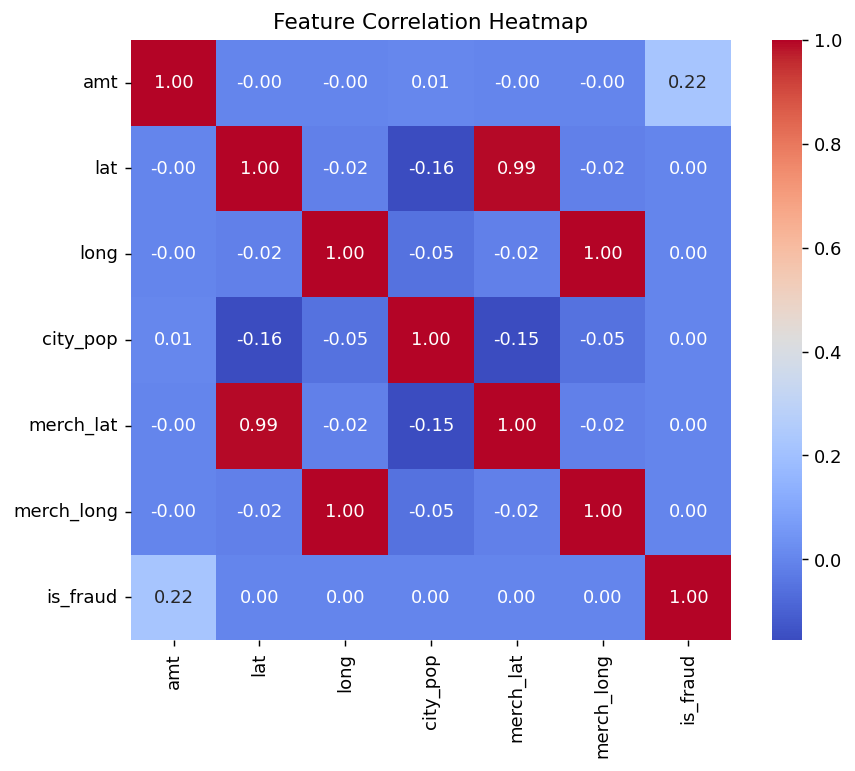

In [15]:
# correlation matrix
corr = train_dataset[num_cols].corr()

plt.figure(figsize=(8, 6), dpi=130)
sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    square=True
)
plt.title("Feature Correlation Heatmap")
plt.show()


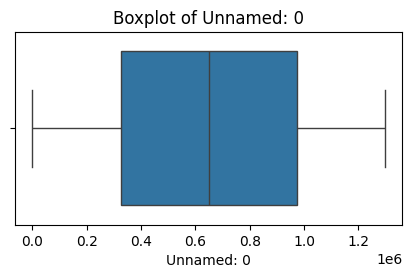

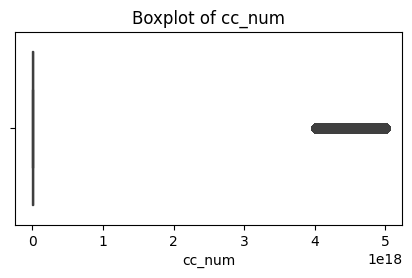

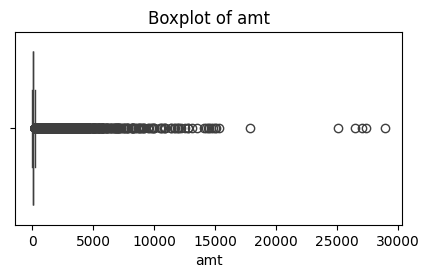

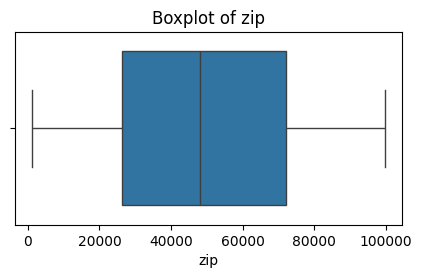

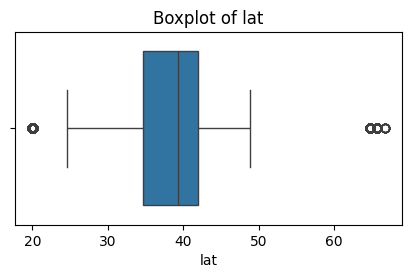

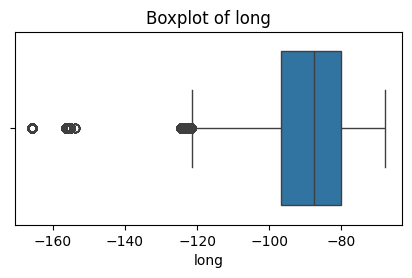

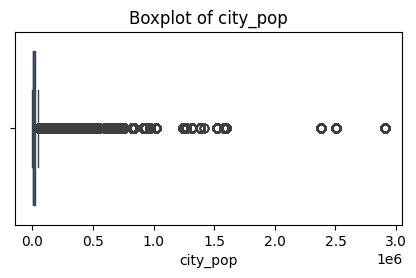

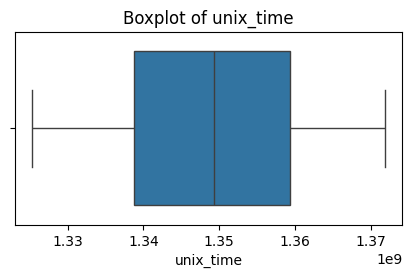

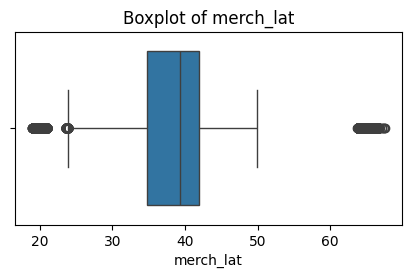

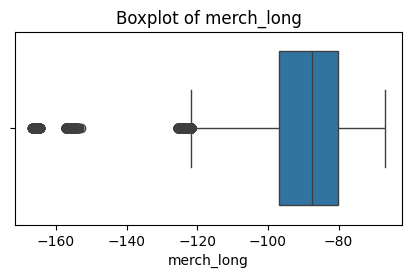

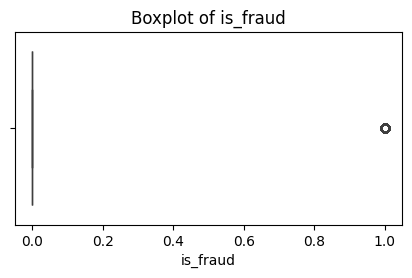

In [10]:
# 6. Outlier plot of numeraical features 
import matplotlib.pyplot as plt
import seaborn as sns

# select only numerical columns
num_cols = train_dataset.select_dtypes(include=['int64', 'float64']).columns

for col in num_cols:
    plt.figure(figsize=(5, 2.5))
    sns.boxplot(x=train_dataset[col])
    plt.title(f"Boxplot of {col}")
    plt.show()


In [19]:
print(train_dataset.columns.tolist())


['trans_date_trans_time', 'category', 'amt', 'gender', 'state', 'lat', 'long', 'city_pop', 'job', 'dob', 'merch_lat', 'merch_long', 'is_fraud']


In [20]:
'''
Feature Preparation Pipeline
'''

# 1. Removing noisy features from training_dataset which are irrelevant for training.
drop_cols = [
    'cc_num', 'first', 'last',
    'street', 'city', 'zip', 'trans_num',
    'unix_time', 'merchant'
]

existing_cols = [col for col in drop_cols if col in train_dataset.columns]

train_dataset = train_dataset.drop(columns=existing_cols)


In [21]:
import pandas as pd

train_dataset['trans_date_trans_time'] = pd.to_datetime(
    train_dataset['trans_date_trans_time']
)

train_dataset['trans_hour'] = train_dataset['trans_date_trans_time'].dt.hour
train_dataset['trans_dayofweek'] = train_dataset['trans_date_trans_time'].dt.dayofweek

train_dataset.drop(columns=['trans_date_trans_time'], inplace=True)


In [22]:
train_dataset['dob'] = pd.to_datetime(train_dataset['dob'])

train_dataset['age'] = (
    pd.to_datetime('today') - train_dataset['dob']
).dt.days // 365

train_dataset.drop(columns=['dob'], inplace=True)


In [23]:
from math import radians, sin, cos, sqrt, atan2

def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # Earth radius in km
    lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = sin(dlat/2)**2 + cos(lat1)*cos(lat2)*sin(dlon/2)**2
    return 2 * R * atan2(sqrt(a), sqrt(1 - a))

train_dataset['cust_merch_dist'] = train_dataset.apply(
    lambda x: haversine(
        x['lat'], x['long'], x['merch_lat'], x['merch_long']
    ),
    axis=1
)

train_dataset.drop(
    columns=['lat', 'long', 'merch_lat', 'merch_long'],
    inplace=True
)


In [25]:
train_dataset.select_dtypes(include='object').columns

train_dataset = pd.get_dummies(
    train_dataset,
    columns=['category', 'gender', 'state', 'job'],
    drop_first=True
)



In [26]:
train_dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Columns: 564 entries, amt to job_Writer
dtypes: bool(557), float64(2), int32(2), int64(3)
memory usage: 748.1 MB


In [29]:
# We can see that job is having too many cols which is high cardinality! in here

'''
Note : As of now :
how to dealt with it : ?
1. Frequency / Top-N Bucketing (Most Common)
-> Keep only the most frequent categories, group the rest as "Other".
'''

'\nNote : As of now :\nhow to dealt with it : ?\n1. Frequency / Top-N Bucketing (Most Common)\n-> Keep only the most frequent categories, group the rest as "Other".\n'

In [30]:
X = train_dataset.drop(columns=['is_fraud'])
y = train_dataset['is_fraud']


In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)




In [33]:
y_train.value_counts(normalize=True)


is_fraud
0    0.994211
1    0.005789
Name: proportion, dtype: float64

In [36]:
from sklearn.preprocessing import StandardScaler

num_cols = X_train.select_dtypes(include=['int64', 'float64']).columns

scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])


In [37]:
# Training : 
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(
    max_iter=1000,
    class_weight='balanced',
    solver='lbfgs'
)
 

In [38]:
log_reg.fit(X_train, y_train)


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [39]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=15,              # controls overfitting
    min_samples_split=50,
    min_samples_leaf=20,
    class_weight='balanced',
    n_jobs=-1,
    random_state=42
)


In [40]:
import time

start = time.perf_counter()
rf.fit(X_train, y_train)
end = time.perf_counter()

print(f"Random Forest training time: {end - start:.2f} seconds")


Random Forest training time: 21.95 seconds


In [41]:
neg, pos = y_train.value_counts()
scale_pos_weight = neg / pos


In [42]:
from xgboost import XGBClassifier

xgb = XGBClassifier(
    n_estimators=200,
    max_depth=6,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    scale_pos_weight=scale_pos_weight,
    objective='binary:logistic',
    eval_metric='aucpr',
    n_jobs=-1,
    random_state=42
)


In [43]:
start = time.perf_counter()
xgb.fit(X_train, y_train)
end = time.perf_counter()

print(f"XGBoost training time: {end - start:.2f} seconds")


XGBoost training time: 17.64 seconds


In [44]:
from sklearn.metrics import roc_auc_score, precision_recall_curve, auc

def evaluate_model(model, X_test, y_test, name):
    y_proba = model.predict_proba(X_test)[:, 1]

    roc = roc_auc_score(y_test, y_proba)

    precision, recall, _ = precision_recall_curve(y_test, y_proba)
    pr_auc = auc(recall, precision)

    return {
        'Model': name,
        'ROC_AUC': roc,
        'PR_AUC': pr_auc
    }


In [45]:
results = []

results.append(evaluate_model(log_reg, X_test, y_test, 'Logistic Regression'))
results.append(evaluate_model(rf, X_test, y_test, 'Random Forest'))
results.append(evaluate_model(xgb, X_test, y_test, 'XGBoost'))

import pandas as pd
results_df = pd.DataFrame(results)
results_df


,Model,ROC_AUC,PR_AUC
0,Logistic Regression,0.928726,0.185695
1,Random Forest,0.974633,0.713492
2,XGBoost,0.998496,0.919801


In [46]:
'''
XGBoost significantly outperformed baseline and ensemble models,
achieving the highest ROC-AUC and PR-AUC, indicating superior
minority-class detection capability in a highly imbalanced fraud setting.
'''

'\nXGBoost significantly outperformed baseline and ensemble models,\nachieving the highest ROC-AUC and PR-AUC, indicating superior\nminority-class detection capability in a highly imbalanced fraud setting.\n'